In [2]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
# import data for analysis
df = pd.read_csv('penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df_clean = df.dropna(subset='sex')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [7]:
df_clean.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

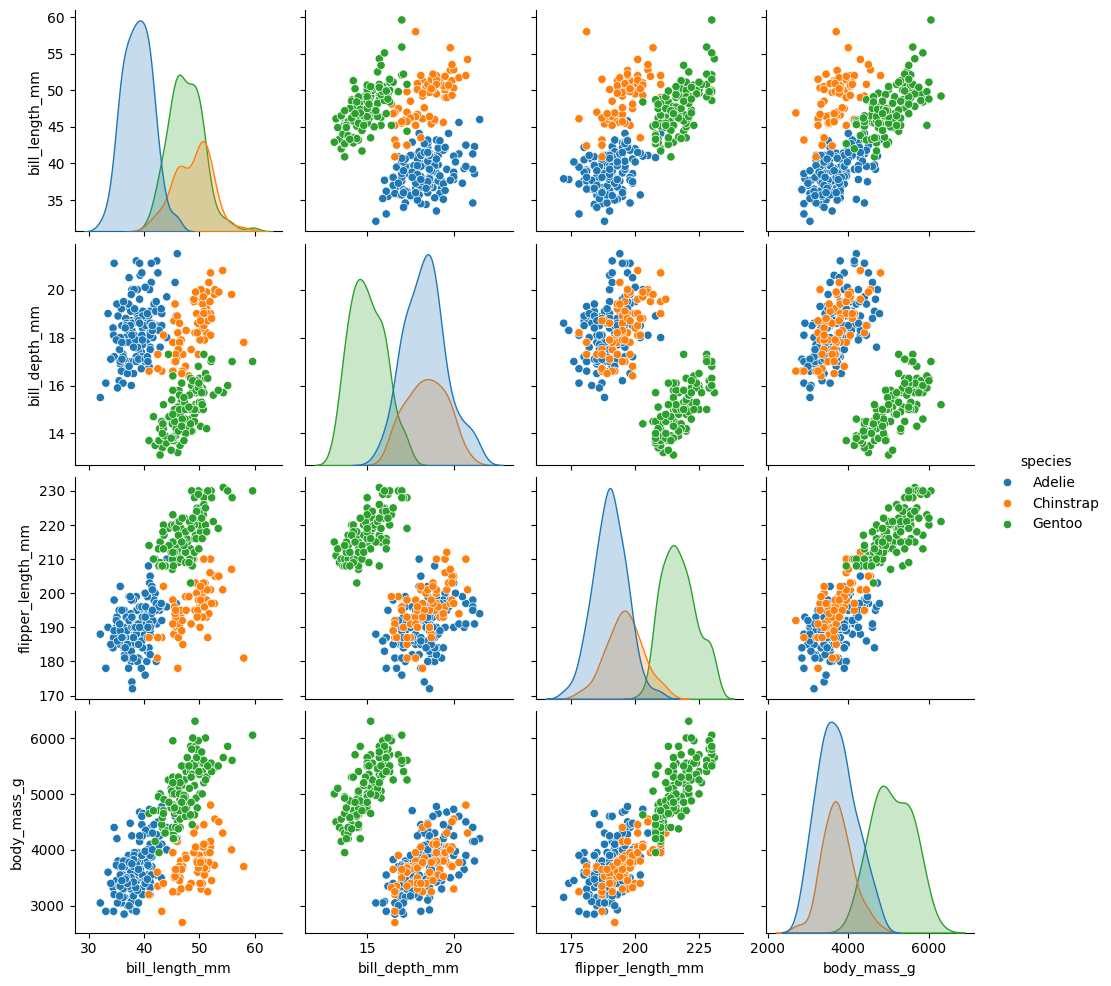

In [11]:
sns.pairplot(df_clean, hue='species', diag_kind='kde')
plt.show()

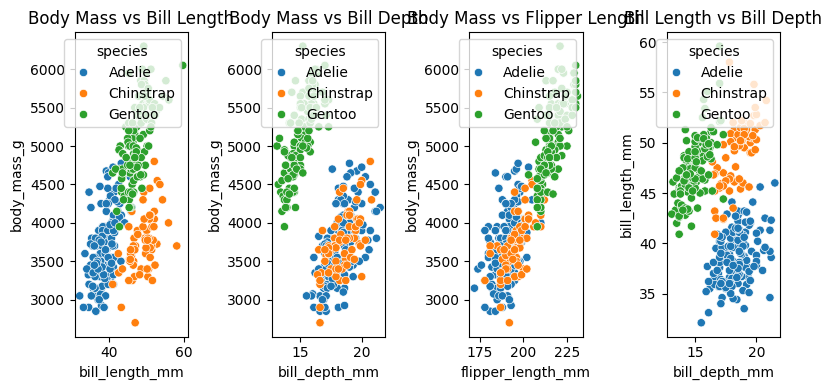

In [20]:
df_numeric = df_clean.loc[:, ['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g',]]

fig, ax = plt.subplots(1, 4,figsize=(8,4))

sns.scatterplot(data=df_clean, y='body_mass_g', x= 'bill_length_mm', hue='species', ax=ax[0])
ax[0].set_title('Body Mass vs Bill Length')

sns.scatterplot(data=df_clean, y='body_mass_g', x= 'bill_depth_mm', hue='species', ax=ax[1])
ax[1].set_title('Body Mass vs Bill Depth')

sns.scatterplot(data=df_clean, y='body_mass_g', x= 'flipper_length_mm', hue='species', ax=ax[2])
ax[2].set_title('Body Mass vs Flipper Length')

sns.scatterplot(data=df_clean, y='bill_length_mm', x= 'bill_depth_mm', hue='species', ax=ax[3])
ax[3].set_title('Bill Length vs Bill Depth')

plt.tight_layout()

plt.show()



In [22]:
X = df_clean.loc[:,['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']]

y = df_clean['species']

from sklearn.preprocessing import LabelEncoder
enchoder = LabelEncoder()
y = enchoder.fit_transform(y)

# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# create a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


# predict the test set results
y_pred = model.predict(X_test)

c:\Users\Owner\explore_uv\explore_UV\dev\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


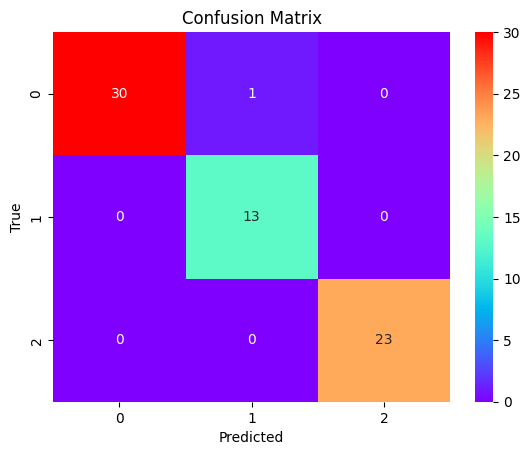

In [29]:
# view confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred, labels=model.classes_)
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap ='rainbow')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()